In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker

Модель нейрона Ижикевича:

$$
\frac{d V}{d t} = 0.04 V^2 + 5V + 140 - u + I
$$

$$
\frac{d u}{dt} = a(bV - u)
$$


Конечно разностная схема:

$$
V_{i+1} = (0.04 V_i^2 + 5V_i + 140 - u_i + I) \Delta t + V_{i}
$$

$$
u_{i+1} = a(bV_i - u_i) \Delta t + u_i
$$

Начальные условия:

$$
V_0 = c, u = 0
$$


(25.0, 180.0)

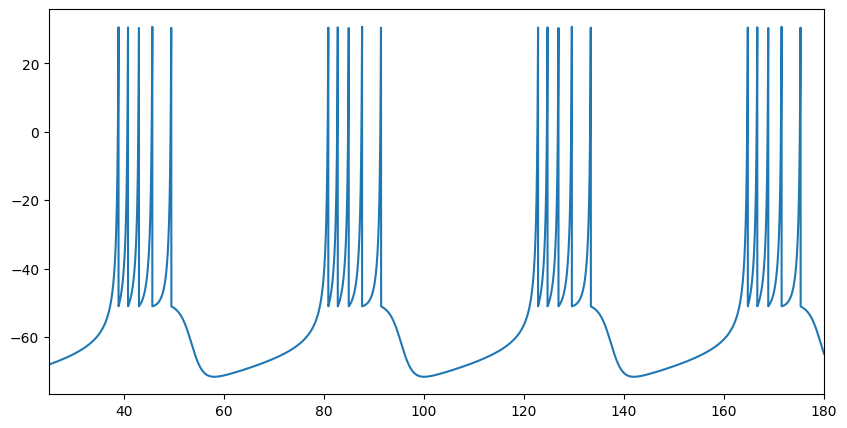

In [3]:
a = 0.02
b = 0.2
c = -51
d = 2
I = 15

V_start = [c]
u_start = [0]

t = np.linspace(0, 200, 100000)
delta_t = t[1] - t[0]
for i in range(len(t) - 1):
    if V_start[i] >= 30:
        V_start.append(c)
        u_start.append(u_start[i] + d)
    else:
        V_start.append((0.04 * V_start[i] ** 2 + 5 * V_start[i] + 140 - u_start[i] + I)* delta_t + V_start[i])
        u_start.append(a * (b * V_start[i] - u_start[i]) * delta_t + u_start[i])

fig, ax = plt.subplots(figsize = [10,5])
ax.plot(t, V_start)
ax.set_xlim([25,180])
#ax.set_ylim([-80,50])

MovieWriter imagemagick unavailable; using Pillow instead.


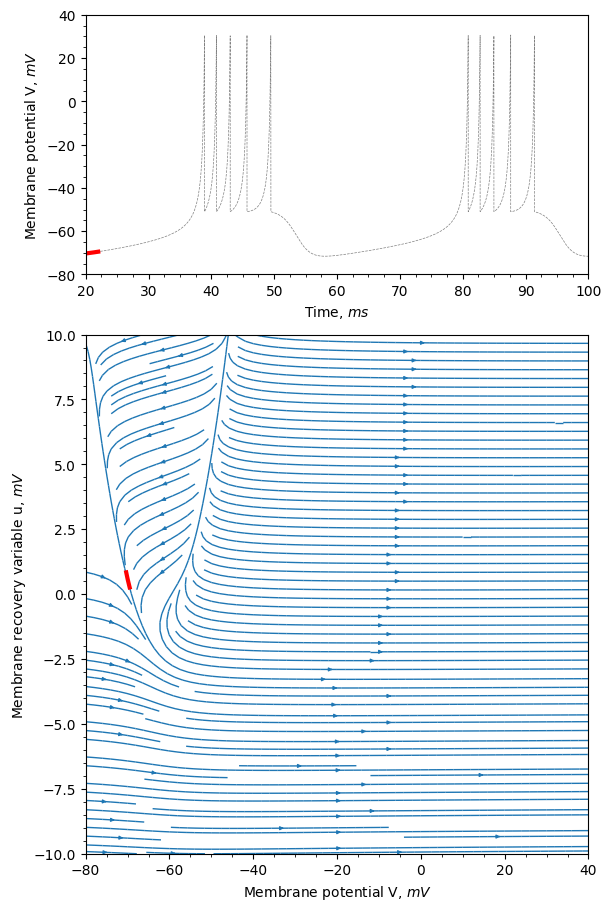

In [31]:
fig = plt.figure(figsize=(6, 9), constrained_layout=True)
#fig.tight_layout(pad=1)
gs = GridSpec(ncols=1, nrows=3, figure=fig)

x, y, z = t[10000:50000], V_start[10000:50000], u_start[10000:50000]

ax_1 = fig.add_subplot(gs[0, 0])
ax_1.plot(x, y, linestyle = 'dashed', linewidth = 0.5, zorder = 1, color = 'gray')
ax_1.set_ylabel(r'Membrane potential V, $mV$')
ax_1.set_xlabel(r'Time, $ms$')
ax_1.set(xlim=[20, 100], ylim=[-80,40])
ax_1.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax_1.xaxis.set_minor_locator(ticker.MultipleLocator(2.5))
ax_1.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax_1.yaxis.set_minor_locator(ticker.MultipleLocator(5))

v = np.linspace(-80, 40, 100)
u = np.linspace(-10, 10, 100)
V, U = np.meshgrid(v, u)
derivarive_v = 0.04 * V ** 2 + 5 * V + 140 - U + I
derivarive_u = a * (b * V - U)

ax_2 = fig.add_subplot(gs[1:, 0])
ax_2.streamplot(V, U, derivarive_v, derivarive_u, linewidth = 1, density = 2, arrowsize = 0.5, zorder = 1)
ax_2.set_xlabel(r'Membrane potential V, $mV$')
ax_2.set_ylabel(r'Membrane recovery variable u, $mV$')
ax_2.set(ylim=[-10, 10], xlim=[-80,40])
ax_2.yaxis.set_major_locator(ticker.MultipleLocator(2.5))
ax_2.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax_2.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax_2.xaxis.set_minor_locator(ticker.MultipleLocator(5))

line, = ax_1.plot([],[], color = 'r', zorder = 2, linewidth = 3)
line_1, = ax_2.plot([],[], color = 'r', zorder = 2, linewidth = 3)

def update(frame):
    line.set_data(x[100 * frame:100 * frame + 1000],y[100 * frame:100 * frame + 1000])
    line_1.set_data(y[100 * frame:100 * frame + 1000],z[100 * frame :100 * frame + 1000])
    return None


 
anim = FuncAnimation(fig, update, frames=400, interval=50)
anim.save('sine_wave.gif', writer='imagemagick')

[(-100.0, -20.0), (-5.0, 15.0)]

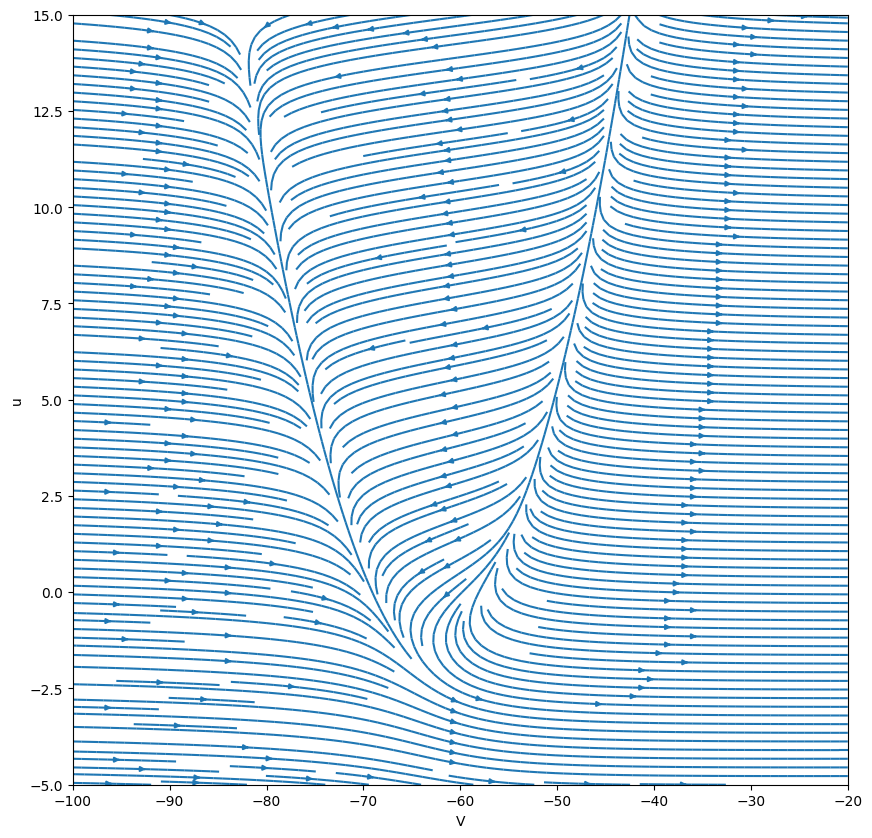

In [20]:
v = np.linspace(-100, -20, 100)
u = np.linspace(-5, 15, 100)
x = np.linspace(-100,-20, 100)
y = 0.04 * x ** 2 + 5 * x + 140 + I

V, U = np.meshgrid(v, u)
derivarive_v = 0.04 * V ** 2 + 5 * V + 140 - U + I
derivarive_u = a * (b * V - U)

fig, ax = plt.subplots(figsize = [10,10])
ax.streamplot(V,u, derivarive_v, derivarive_u, density = 3, arrowsize = 0.7)
#ax.plot(x, y)
ax.set_xlabel('V')
ax.set_ylabel('u')
ax.set(xlim=[-100, -20], ylim=[-5,15])
#ax.scatter(u_start[2000], V_start[2000], color = 'r')
#plt.savefig('phase.png', dpi = 300, bbox_inches = 'tight')
